# PyTorch Primer

In [10]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

In [11]:
device = torch.device("cpu")

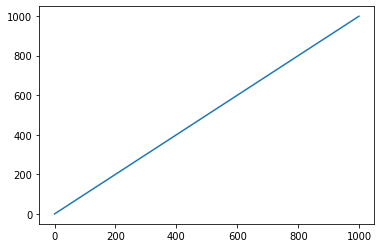

In [12]:
torch.linspace(0, 1000, 1000, dtype=int)
plt.plot()

## Loss Function

This will define how "good" (or bad) a solution is

In [89]:
def loss_fn(x1, x2):
    assert len(x1) == len(x2)
    return torch.linalg.norm(x2 - x1)

loss_fn(torch.tensor([1,2], dtype=float), torch.tensor([0,1], dtype=float)).detach().numpy()

array(1.41421356)

Loss= 1.0037251710891724
Loss= 0.9511088728904724
Loss= 0.8993508815765381
Loss= 0.848534107208252
Loss= 0.7987556457519531
Loss= 0.7501215934753418
Loss= 0.702743649482727
Loss= 0.656731903553009
Loss= 0.6121853590011597
Loss= 0.5691832304000854


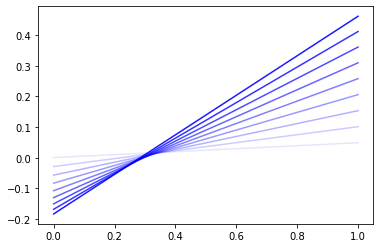

In [102]:
# Learn a NN to make a linear function ax + b
from torch import nn

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Linear(2, 2)
)
x = torch.tensor([1.0,2.0])
lr = 0.0001
preds = []
y = torch.tensor([0,1], dtype=torch.float)

for i in range(1000):
    y_pred = model(x)
    loss = loss_fn(y, y_pred)
    
    if i % 100 == 0:
        print("Loss=",loss.item())
        preds.append(y_pred)
    
    model.zero_grad()
    loss.backward()
    
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad


for i,pred in enumerate(preds):
    plt.plot(pred.detach().numpy(), c=(0,0,1,i/len(preds)))
    
# plt.xlim(0,1)
# plt.ylim(0,1)


tensor([0., 1.]) tensor([1.1153, 0.8077], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([1.0341, 0.8831], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.9883, 0.9204], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.9464, 0.9502], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.9057, 0.9740], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.8654, 0.9904], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.8253, 0.9981], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.7853, 0.9999], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.7453, 1.0000], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.7053, 1.0000], grad_fn=<AddBackward0>)


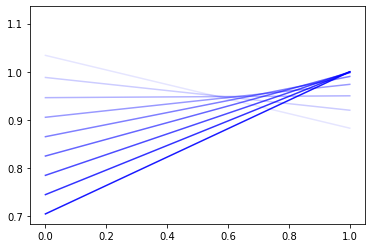

In [103]:


model = nn.Sequential(nn.Linear(2, 2))
x = torch.tensor([1.0,2.0])
lr = 0.0001
optim = torch.optim.RMSprop(model.parameters(), lr=lr) # This is new
preds = []
for i in range(1000):
    y = torch.tensor([0,1], dtype=torch.float)
    y_pred = model(x)

    
    if i % 100 == 0:
        print(y, y_pred)
        preds.append(y_pred)
    
    loss = loss_fn(y, y_pred)
    model.zero_grad()
    loss.backward()
    
    optim.step()


for i,pred in enumerate(preds):
    plt.plot(pred.detach().numpy(), c=(0,0,1,i/len(preds)))
